In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import a 311 NYC service request.
Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?

In [21]:
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5884\521123843.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [22]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [25]:
df['Created Date']=pd.to_datetime(df['Created Date'])
df['Closed Date']=pd.to_datetime(df['Closed Date'])

In [50]:
df['Request_Closing_Time']=df['Closed Date']-df['Created Date']
Request_Closing_Time=[]
for x in df['Closed Date']-df['Created Date']:
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
df['Request_Closing_Time']= Request_Closing_Time   
    

In [56]:
df['Agency'].value_counts()

NYPD    364558
Name: Agency, dtype: int64

In [57]:
df['Agency'].unique()

array(['NYPD'], dtype=object)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

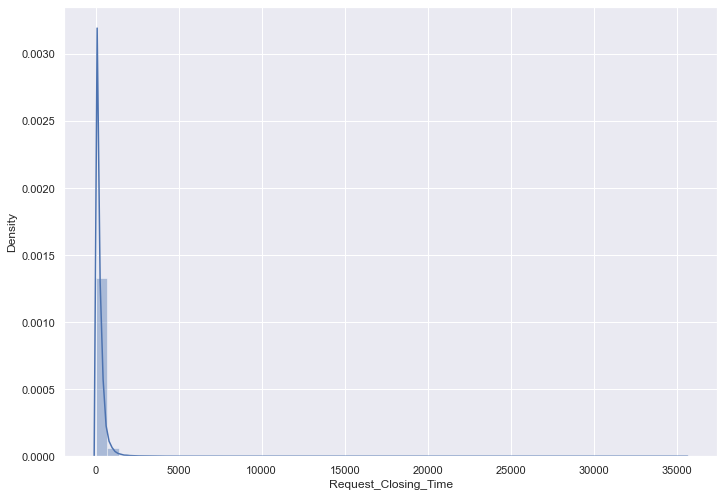

In [63]:
sns.distplot(df["Request_Closing_Time"])
plt.show

In [70]:
print('total number of complaints',len(df),'\n')
print('No. of complaints within 100 hours',round((len(df)-(df["Request_Closing_Time"]>100).sum())/len(df)*100,2),"%")
print('No. of complaints witnin 1000 hours',round((len(df)-(df["Request_Closing_Time"]>1000).sum())/len(df)*100,2),'%')

total number of complaints 364558 

No. of complaints within 100 hours 33.63 %
No. of complaints witnin 1000 hours 97.44 %


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


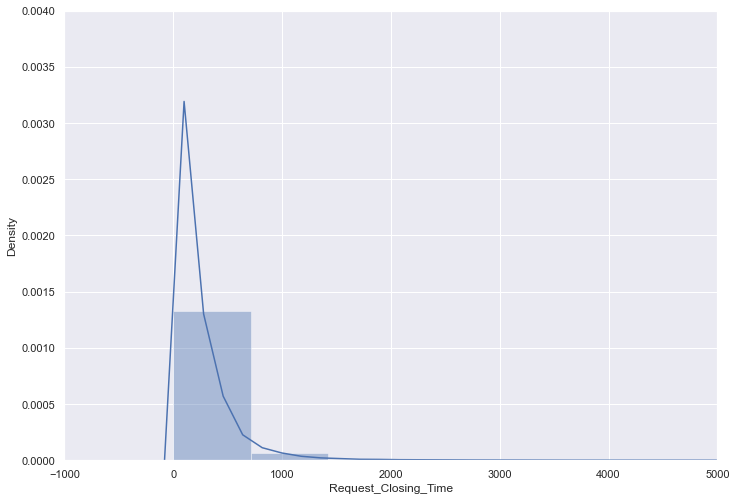

In [76]:
sns.distplot(df["Request_Closing_Time"])
plt.xlim((-1000,5000))
plt.ylim((0,0.0040))
plt.show()

<AxesSubplot:>

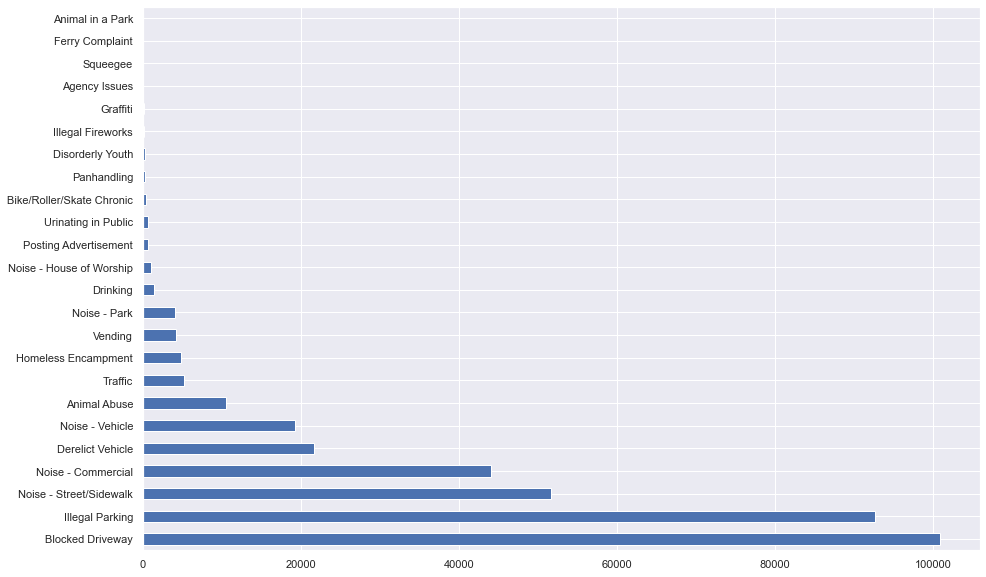

In [78]:
df['Complaint Type'].value_counts().plot(kind="barh",figsize=(15,10))

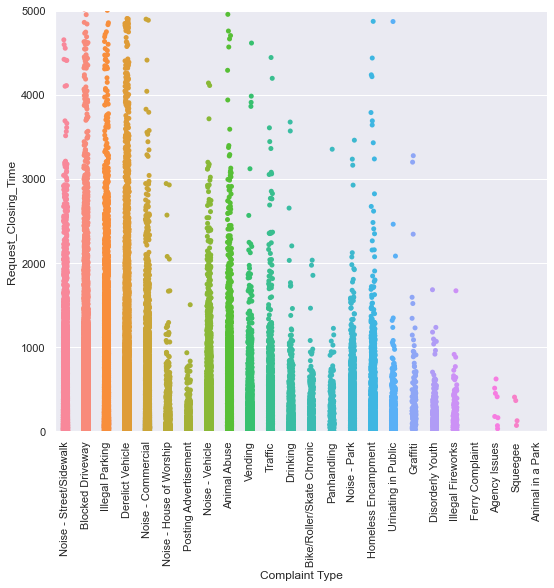

In [81]:
plot1=sns.catplot(x='Complaint Type',y='Request_Closing_Time',data=df)
plot1.fig.set_figwidth(10)
plot1.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,5000))
plt.show()

More than 85% of complaints are from blocked driveway, Noise-Street/Sidewalk, Illegal parking and Noise-Vehicle and there complaints are taking more time to get resolved. Government should come up with more strategies to reduce the numerber of complaints

In [82]:
df['Borough'].value_counts()

BROOKLYN         118864
QUEENS           100766
MANHATTAN         77462
BRONX             49169
STATEN ISLAND     15339
Unspecified        2958
Name: Borough, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


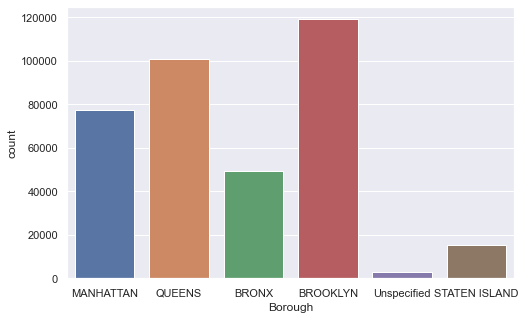

In [89]:
plt.figure(figsize=(8,5))
plot2=sns.countplot(df['Borough'])

In [91]:
for x in df['Borough'].unique():
    print("percentag of complaints from",x,'division:',round((df['Borough']==x).sum()/len(df)*100,2))

percentag of complaints from MANHATTAN division: 21.25
percentag of complaints from QUEENS division: 27.64
percentag of complaints from BRONX division: 13.49
percentag of complaints from BROOKLYN division: 32.6
percentag of complaints from Unspecified division: 0.81
percentag of complaints from STATEN ISLAND division: 4.21


In [92]:
df['Location Type'].value_counts()

Street/Sidewalk               301372
Store/Commercial               25217
Club/Bar/Restaurant            21527
Residential Building/House      8869
Park/Playground                 4871
House of Worship                1068
Residential Building             533
Highway                          265
House and Store                  245
Parking Lot                      167
Commercial                       108
Vacant Lot                        95
Roadway Tunnel                    43
Subway Station                    40
Bridge                             2
Terminal                           1
Ferry                              1
Park                               1
Name: Location Type, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Street/Sidewalk'),
 Text(1, 0, 'Club/Bar/Restaurant'),
 Text(2, 0, 'Store/Commercial'),
 Text(3, 0, 'House of Worship'),
 Text(4, 0, 'Residential Building/House'),
 Text(5, 0, 'Residential Building'),
 Text(6, 0, 'Park/Playground'),
 Text(7, 0, 'Vacant Lot'),
 Text(8, 0, 'House and Store'),
 Text(9, 0, 'Highway'),
 Text(10, 0, 'Commercial'),
 Text(11, 0, 'Roadway Tunnel'),
 Text(12, 0, 'Subway Station'),
 Text(13, 0, 'Parking Lot'),
 Text(14, 0, 'Bridge'),
 Text(15, 0, 'Terminal'),
 Text(16, 0, 'Ferry'),
 Text(17, 0, 'Park')]

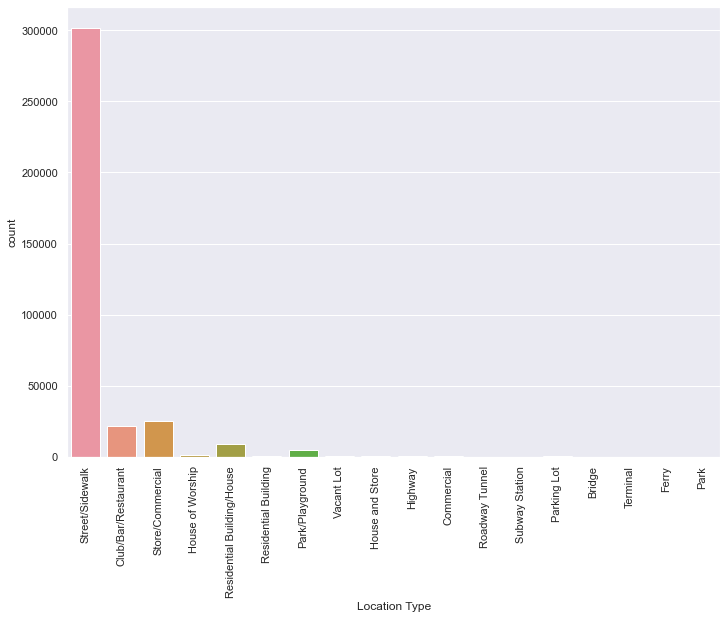

In [98]:
plot3=sns.countplot(df['Location Type'])
plot3.set_xticklabels(plot3.get_xticklabels(),rotation=90)

In [101]:
pd.DataFrame(df.groupby('Location Type')['Request_Closing_Time'].mean()).sort_values('Request_Closing_Time')

,Request_Closing_Time
Location Type,
Subway Station,145.120000
Club/Bar/Restaurant,183.492218
House of Worship,190.052861
Store/Commercial,192.928792
Highway,204.372348
Park/Playground,206.594724
Bridge,229.458333
Street/Sidewalk,261.052945
Residential Building,267.260350


In [102]:
pd.DataFrame(df.groupby('City')['Request_Closing_Time'].mean()).sort_values('Request_Closing_Time')

,Request_Closing_Time
City,
ARVERNE,137.840605
ROCKAWAY PARK,139.602908
LITTLE NECK,155.031437
OAKLAND GARDENS,156.240167
BAYSIDE,160.062978
FAR ROCKAWAY,161.193068
NEW YORK,175.343723
FLUSHING,177.446478
FOREST HILLS,184.097636


In [108]:
pd.DataFrame((df.isnull().sum()/df.shape[0]*100)).sort_values(0,ascending=False)[:20]

,0
School or Citywide Complaint,100.000000
Vehicle Type,100.000000
Garage Lot Name,100.000000
Taxi Company Borough,100.000000
Taxi Pick Up Location,100.000000
Ferry Direction,99.999726
Ferry Terminal Name,99.999451
Road Ramp,99.928132
Bridge Highway Segment,99.928132
Bridge Highway Direction,99.918531


In [109]:
df1=df.loc[:,(df.isnull().sum()/df.shape[0]*100)<=50]

In [110]:
print('old dataframe', df.shape)
print('new dataframe',df1.shape)

old dataframe (364558, 55)
new dataframe (364558, 41)


In [115]:
rem=[]
for x in df1.columns.tolist():
    if df1[x].nunique()<=3:
        print(x+ " "*10+" : ",df1[x].unique())
        rem.append(x)
    

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']


abouve mentioned columns doesnt have much details and are unspecified. So we can drop those columns

In [116]:
df1.drop(rem, axis=1,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5884\2361587210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(rem, axis=1,inplace=True)


In [117]:
df1.shape

(364558, 27)

In [118]:
rem1=["Unique Key","Incident Address","Descriptor","Street Name","Cross Street 1","Cross Street 2","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","X Coordinate (State Plane)","Y Coordinate (State Plane)","Park Borough","Latitude","Longitude","Location"]

df1.drop(rem1,axis=1,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5884\1858048086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(rem1,axis=1,inplace=True)


In [122]:
df1.head()

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Address Type,City,Status,Borough,Request_Closing_Time,Request_Closing_hour
0,2015-12-31 23:59:45,2016-01-01 00:55:15,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Closed,MANHATTAN,55.500000,1.0
1,2015-12-31 23:59:44,2016-01-01 01:26:57,Blocked Driveway,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Closed,QUEENS,87.216667,2.0
2,2015-12-31 23:59:29,2016-01-01 04:51:03,Blocked Driveway,Street/Sidewalk,10458.0,ADDRESS,BRONX,Closed,BRONX,291.566667,5.0
3,2015-12-31 23:57:46,2016-01-01 07:43:13,Illegal Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Closed,BRONX,465.450000,8.0
4,2015-12-31 23:56:58,2016-01-01 03:24:42,Illegal Parking,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Closed,QUEENS,207.733333,4.0


In [121]:
from scipy import stats
from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols

Hypothesis testing

(0.0, 2000.0)

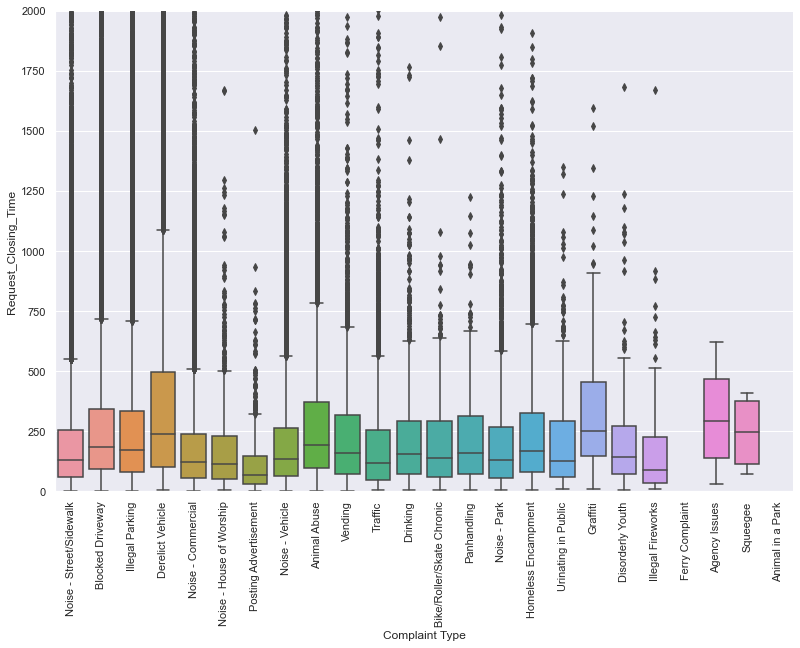

In [128]:
g=sns.catplot(x="Complaint Type",y="Request_Closing_Time",kind="box",data=df1)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.xticks(rotation=90)
plt.ylim(0,2000)

In [137]:
anova_df=pd.DataFrame()
anova_df['Complaint']=df1['Complaint Type']
anova_df['Request_Closing_Time']=df1['Request_Closing_Time']
anova_df.dropna(inplace=True)
anova_df.head()

,Complaint,Request_Closing_Time
0,Noise - Street/Sidewalk,55.500000
1,Blocked Driveway,87.216667
2,Blocked Driveway,291.566667
3,Illegal Parking,465.450000
4,Illegal Parking,207.733333


H0 = there is no significant difference in closing time of different complaint types
H1 = There is a significant difference in closing time of different complaint types

In [138]:
lm=ols("Request_Closing_Time~Complaint",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,22.0,1.487316e+09,6.760526e+07,565.26157,0.0
Residual,362154.0,4.331361e+10,1.196000e+05,NaN,NaN


since the p value is less than 0.01 we accept alternate hypothesis

h0 = complaint type and location type are independent
h1 = complaint type and location type are dependent

In [139]:
chi_sq=pd.DataFrame()
chi_sq['complaint']=df1['Complaint Type']
chi_sq['location']=df1['Location Type']
chi_sq.dropna(inplace=True)
chi_sq.head()

,complaint,location
0,Noise - Street/Sidewalk,Street/Sidewalk
1,Blocked Driveway,Street/Sidewalk
2,Blocked Driveway,Street/Sidewalk
3,Illegal Parking,Street/Sidewalk
4,Illegal Parking,Street/Sidewalk


In [142]:
data_crosstab = pd.crosstab( chi_sq["location"],chi_sq["complaint"])

In [143]:
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)
